In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report, roc_curve

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder 

In [2]:
# !pip install xgboost
# !python.exe -m pip install --upgrade pip

In [3]:
df = pd.read_csv("../data_source/drug.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.Sex.value_counts()#unique()

Sex
M    104
F     96
Name: count, dtype: int64

In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
df.Drug.value_counts()#unique()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: ylabel='Count'>

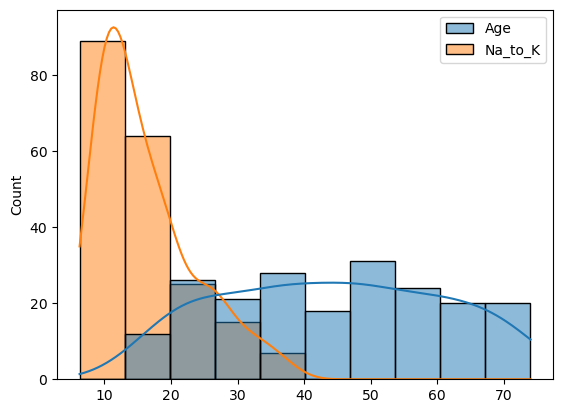

In [9]:
sns.histplot(data=df, kde=True)

<Axes: xlabel='BP', ylabel='count'>

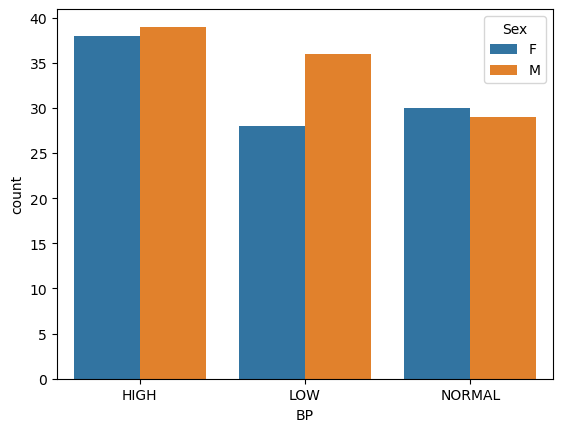

In [10]:
sns.countplot(data=df, x="BP", hue="Sex")

<Axes: xlabel='Drug', ylabel='count'>

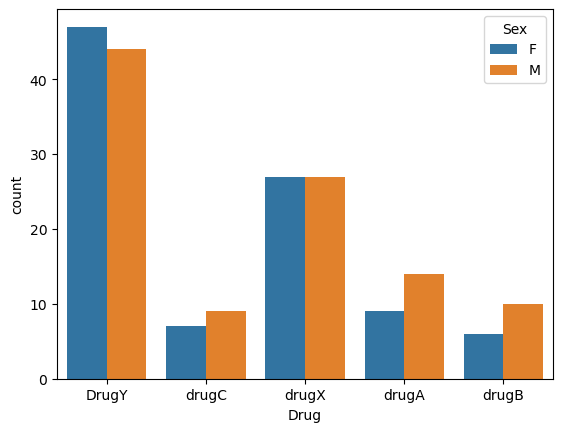

In [11]:
sns.countplot(data=df,x="Drug", hue="Sex")

In [12]:
num=[]
cat=[]
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [13]:
# data split

# X = df.drop("Drug", axis=1).values
# y = df.Drug.values
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
x_train = pd.get_dummies(X_train)
x_test = pd.get_dummies(X_test)

In [15]:
x_train

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
169,20,11.262,True,False,True,False,False,True,False
97,56,25.395,True,False,True,False,False,True,False
31,74,9.567,False,True,True,False,False,True,False
12,43,15.376,False,True,False,True,False,True,False
35,46,7.285,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
106,22,11.953,False,True,False,False,True,True,False
14,50,12.703,True,False,False,False,True,True,False
92,29,29.450,True,False,True,False,False,True,False
179,67,15.891,True,False,False,False,True,True,False


C:\Users\sudwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  LogisticRegression()
Accuracy score: 0.933

Classification Report:               precision    recall  f1-score   support

       DrugY       0.96      0.96      0.96        26
       drugA       1.00      0.71      0.83         7
       drugB       0.50      1.00      0.67         3
       drugC       1.00      0.83      0.91         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.93        60
   macro avg       0.89      0.90      0.87        60
weighted avg       0.96      0.93      0.94        60



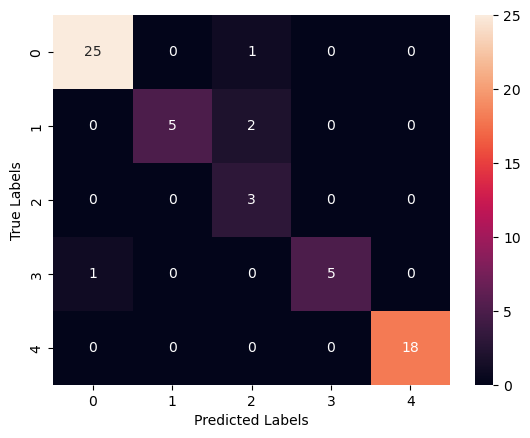

In [16]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Model: ',clf)
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:", classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Model:  LogisticRegression(max_iter=5000, solver='liblinear')
Accuracy score: 0.933

Classification Report:               precision    recall  f1-score   support

       DrugY       0.96      0.96      0.96        26
       drugA       1.00      0.71      0.83         7
       drugB       0.50      1.00      0.67         3
       drugC       1.00      0.83      0.91         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.93        60
   macro avg       0.89      0.90      0.87        60
weighted avg       0.96      0.93      0.94        60



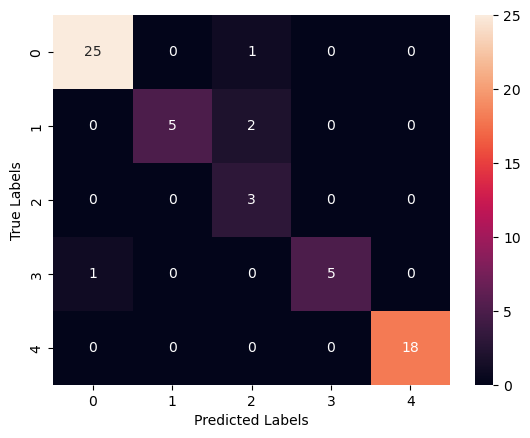

In [17]:
# logistcreg with params
clfr = LogisticRegression(solver='liblinear', max_iter=5000)
clfr.fit(x_train, y_train)

y_pred = clfr.predict(x_test)

print('Model: ',clfr)
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:", classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [18]:
### SMOTE
from imblearn.over_sampling import SMOTE
X_train_sm, y_train_sm = SMOTE().fit_resample(x_train, y_train)
X_train_sm.shape,y_train_sm.shape

((325, 9), (325,))

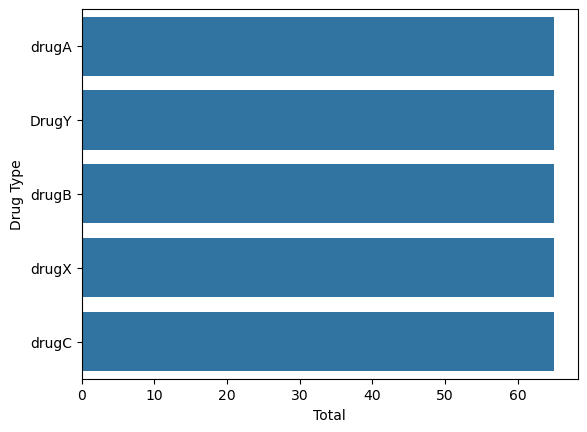

In [19]:
sns.countplot(y=y_train_sm, data=df)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [20]:
# X_train_sm, y_train_sm, x_test, y_test

C:\Users\sudwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  LogisticRegression(max_iter=5000, solver='liblinear')
Accuracy score: 0.933

Classification Report:               precision    recall  f1-score   support

       DrugY       0.96      0.96      0.96        26
       drugA       1.00      0.71      0.83         7
       drugB       0.50      1.00      0.67         3
       drugC       1.00      0.83      0.91         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.93        60
   macro avg       0.89      0.90      0.87        60
weighted avg       0.96      0.93      0.94        60



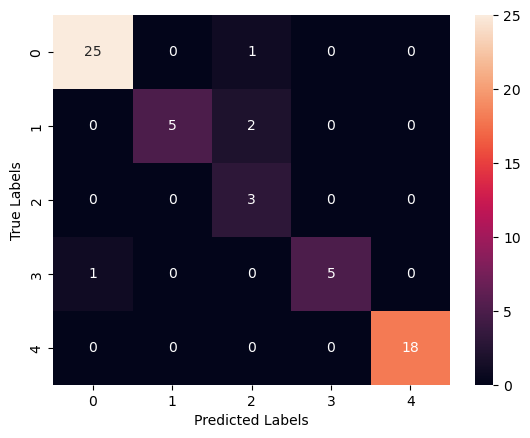

In [21]:
#logisticcReg SMOTE
clfsm = LogisticRegression()
clfsm.fit(X_train_sm, y_train_sm)

y_pred = clfr.predict(x_test)

print('Model: ',clfr)
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:", classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Model:  LogisticRegression(max_iter=5000, solver='liblinear')
Accuracy score: 0.933

Classification Report:               precision    recall  f1-score   support

       DrugY       1.00      0.92      0.96        26
       drugA       1.00      0.71      0.83         7
       drugB       0.43      1.00      0.60         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.93        60
   macro avg       0.89      0.93      0.88        60
weighted avg       0.97      0.93      0.94        60



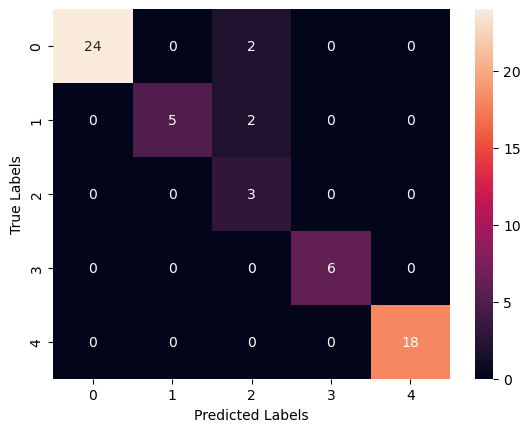

In [22]:
#logisticcReg SMOTE with params
clfsmpa = LogisticRegression(solver='liblinear', max_iter=5000)
clfsmpa.fit(X_train_sm, y_train_sm)

y_pred = clfsmpa.predict(x_test)

print('Model: ',clfsmpa)
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:", classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
# try pipeline
x=X.copy()
y=y.copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.shape, y_train.shape

cat_col = [1,2,3]
num_col = [0,4]

# Define the transformer
transform = ColumnTransformer(
    transformers=[
        ("encoder", Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
            ('encoder', OrdinalEncoder()) 
        ]), cat_col),
        
        ("num_transform", Pipeline(steps=[
            ('imputer', SimpleImputer(strategy="median")),  # Impute missing numeric values
            ('scaler', StandardScaler())  
        ]), num_col),
    ],
    remainder='passthrough'  # Keep other columns as is
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('transform', transform),
    ('smote', SMOTE()),  # Apply SMOTE for oversampling
    ('classifier', LogisticRegression(solver='liblinear', max_iter=5000))  # Logistic regression
])


# Fit the pipeline
pipeline.fit(x_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  [1, 2, 3]),
                                                 ('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 4])])),
                ('smote', SMOTE()),
                ('classifier',
                 LogisticRegression(max_iter=5000, solver='liblinear'))])

Model
Accuracy score: 0.833

Classification Report:               precision    recall  f1-score   support

       DrugY       0.96      0.85      0.90        26
       drugA       0.88      1.00      0.93         7
       drugB       0.50      1.00      0.67         3
       drugC       1.00      0.17      0.29         6
       drugX       0.77      0.94      0.85        18

    accuracy                           0.83        60
   macro avg       0.82      0.79      0.73        60
weighted avg       0.87      0.83      0.81        60



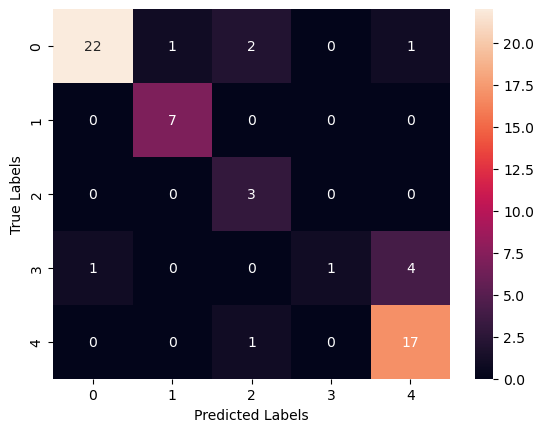

In [24]:
y_pred = pipeline.predict(x_test)

# print('Model: ',pipeline)
print('Model')
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:", classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sudwa\\Desktop\\ml_drug_classification\\notebook\\output\\model_results.png'

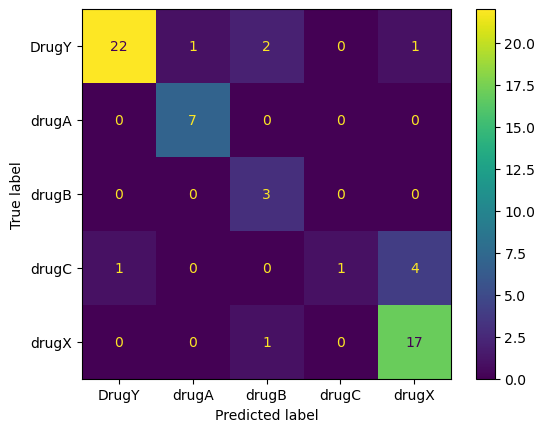

In [25]:
predictions = pipeline.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.savefig("output/model_results.png", dpi=120)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier


# Models to evaluate
models = {
    "Random Forest": RandomForestClassifier(max_leaf_nodes=30),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=20),
    "SVC": SVC(kernel='linear', max_iter=251),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_leaf_nodes=20),
}

for model_name, model in models.items():
    print(model_name, model)


Random Forest RandomForestClassifier(max_leaf_nodes=30)
KNeighborsClassifier KNeighborsClassifier(n_neighbors=20)
SVC SVC(kernel='linear', max_iter=251)
DecisionTreeClassifier DecisionTreeClassifier(max_leaf_nodes=20)



Evaluating Random Forest...
Model
Accuracy score: 1.000

Classification Report:               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



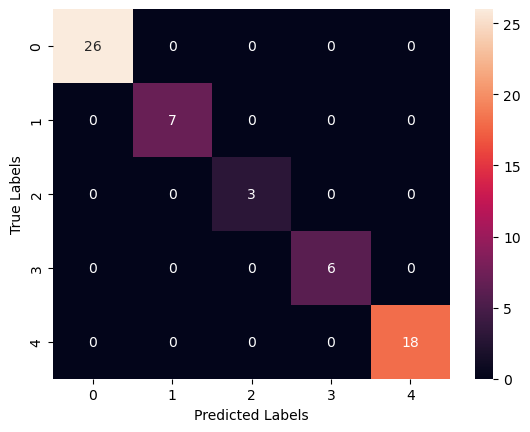


Evaluating KNeighborsClassifier...
Model
Accuracy score: 0.733

Classification Report:               precision    recall  f1-score   support

       DrugY       1.00      0.69      0.82        26
       drugA       0.56      0.71      0.62         7
       drugB       0.33      1.00      0.50         3
       drugC       0.55      1.00      0.71         6
       drugX       0.92      0.67      0.77        18

    accuracy                           0.73        60
   macro avg       0.67      0.81      0.68        60
weighted avg       0.85      0.73      0.76        60



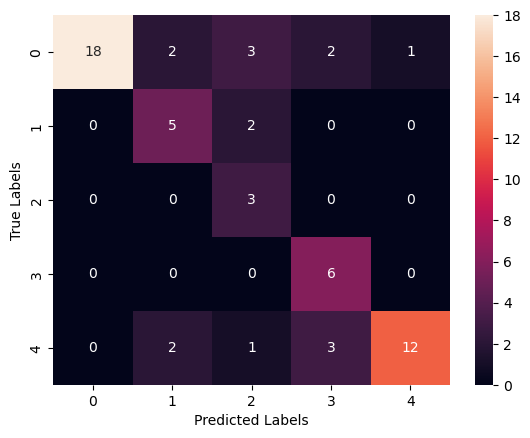


Evaluating SVC...


C:\Users\sudwa\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model
Accuracy score: 0.967

Classification Report:               precision    recall  f1-score   support

       DrugY       1.00      0.92      0.96        26
       drugA       1.00      1.00      1.00         7
       drugB       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.97        60
   macro avg       0.92      0.98      0.94        60
weighted avg       0.98      0.97      0.97        60



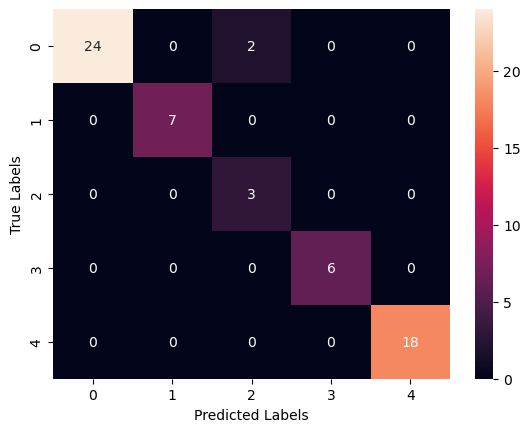


Evaluating DecisionTreeClassifier...
Model
Accuracy score: 1.000

Classification Report:               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



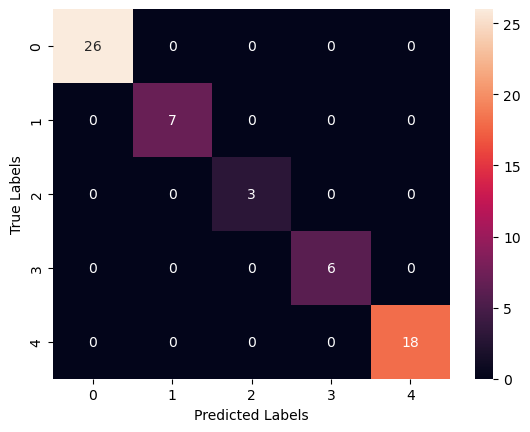

In [27]:
# try pipeline
xp=X.copy()
yp=y.copy()

X_train, X_test, y_train, y_test = train_test_split(xp, yp, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape

cat_col = [1,2,3]
num_col = [0,4]

# Define the transformer
transform = ColumnTransformer(
    transformers=[
        ("encoder", Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
            ('encoder', OrdinalEncoder()) 
        ]), cat_col),
        
        ("num_transform", Pipeline(steps=[
            ('imputer', SimpleImputer(strategy="median")),  # Impute missing numeric values
            ('scaler', StandardScaler())  
        ]), num_col),
    ],
    remainder='passthrough'  # Keep other columns as is
)


# Loop through each model and evaluate
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
        
    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('transform', transform),
        ('smote', SMOTE()),  # Apply SMOTE for oversampling
        ('classifier', model)  # Use the current model
        ])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    # print('Model: ',pipeline)
    print('Model')
    print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
    print("\nClassification Report:", classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



Evaluating Random Forest with GridSearchCV...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Accuracy:  100.0% F1:  1.0
Model
Accuracy score: 1.000

Classification Report:               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



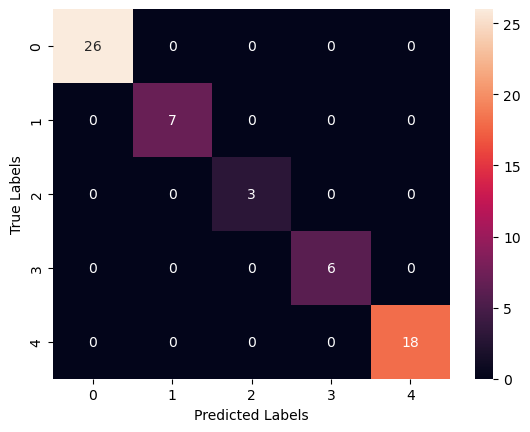


Evaluating KNeighborsClassifier with GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for KNeighborsClassifier: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Accuracy:  97.0% F1:  0.94
Model
Accuracy score: 0.967

Classification Report:               precision    recall  f1-score   support

       DrugY       1.00      0.92      0.96        26
       drugA       1.00      1.00      1.00         7
       drugB       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.97        60
   macro avg       0.92      0.98      0.94        60
weighted avg       0.98      0.97      0.97        60



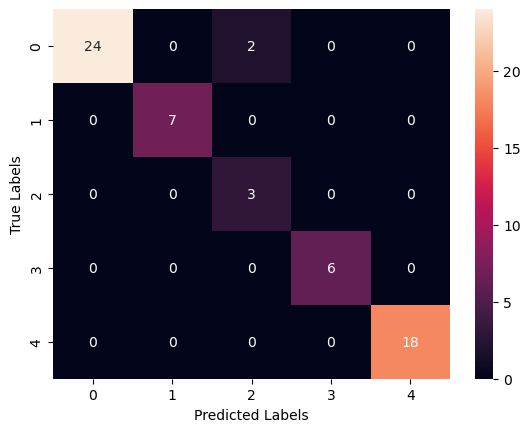


Evaluating SVC with GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for SVC: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Accuracy:  97.0% F1:  0.94
Model
Accuracy score: 0.967

Classification Report:               precision    recall  f1-score   support

       DrugY       1.00      0.92      0.96        26
       drugA       1.00      1.00      1.00         7
       drugB       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           0.97        60
   macro avg       0.92      0.98      0.94        60
weighted avg       0.98      0.97      0.97        60



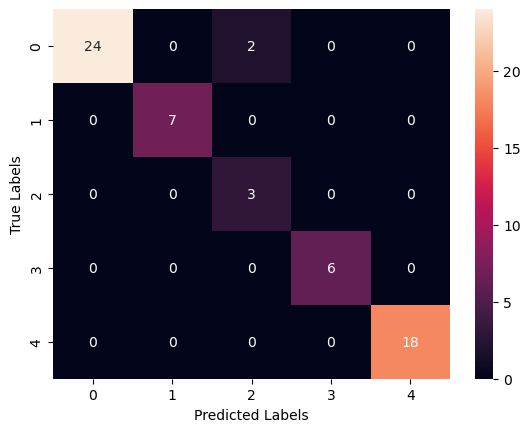


Evaluating DecisionTreeClassifier with GridSearchCV...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for DecisionTreeClassifier: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2}
Accuracy:  100.0% F1:  1.0
Model
Accuracy score: 1.000

Classification Report:               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



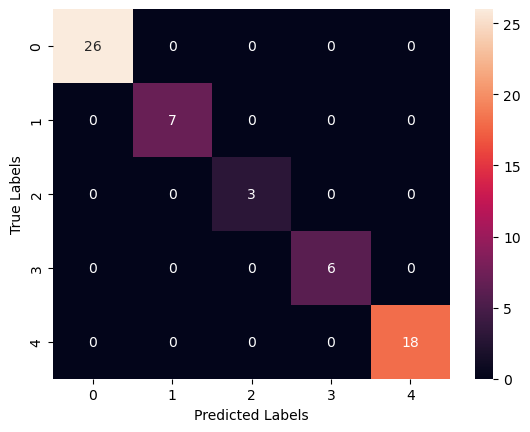

In [28]:
## GridSearch
from sklearn.model_selection import GridSearchCV
# try pipeline
xg=X.copy()
yg=y.copy()

X_train, X_test, y_train, y_test = train_test_split(xg, yg, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape

cat_col = [1,2,3]
num_col = [0,4]

results={}

# Define the transformer
transform = ColumnTransformer(
    transformers=[
        ("encoder", Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
            ('encoder', OrdinalEncoder()) 
        ]), cat_col),
        
        ("num_transform", Pipeline(steps=[
            ('imputer', SimpleImputer(strategy="median")),  # Impute missing numeric values
            ('scaler', StandardScaler())  
        ]), num_col),
    ],
    remainder='passthrough'  # Keep other columns as is
)

models_grids = {
    "Random Forest": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
}

param_grids = {
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    "KNeighborsClassifier": {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    },
    "SVC": {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    },
    "DecisionTreeClassifier": {
        'classifier__max_depth': [10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    }
}

# Loop through each model and evaluate
for model_name, model in models_grids.items():
    print(f"\nEvaluating {model_name} with GridSearchCV...")
        
    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('transform', transform),
        ('smote', SMOTE()),  # Apply SMOTE for oversampling
        ('classifier', model)  # Use the current model
        ])

    # Apply GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=3, n_jobs=-1, verbose=1)
        
    # Fit the model using GridSearchCV
    grid_search.fit(x_train, y_train)

    # Best hyperparameters found by GridSearchCV
    best_params = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_params}")

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Predict and evaluate using the best model
    y_pred = best_model.predict(x_test)
        
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    print("Accuracy: ", str(round(accuracy, 2) * 100) + "%", "F1: ", round(f1, 2))


    print('Model')
    print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
    print("\nClassification Report:", classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Store results
    results[model_name] = {
        "accuracy": accuracy,
        "f1":f1,
        "best_params": best_params
        }


In [29]:
results

{'Random Forest': {'accuracy': 1.0,
  'f1': 1.0,
  'best_params': {'classifier__max_depth': 20,
   'classifier__min_samples_split': 2,
   'classifier__n_estimators': 200}},
 'KNeighborsClassifier': {'accuracy': 0.9666666666666667,
  'f1': 0.942,
  'best_params': {'classifier__metric': 'euclidean',
   'classifier__n_neighbors': 3,
   'classifier__weights': 'distance'}},
 'SVC': {'accuracy': 0.9666666666666667,
  'f1': 0.942,
  'best_params': {'classifier__C': 1,
   'classifier__gamma': 'scale',
   'classifier__kernel': 'linear'}},
 'DecisionTreeClassifier': {'accuracy': 1.0,
  'f1': 1.0,
  'best_params': {'classifier__max_depth': 10,
   'classifier__min_samples_split': 2}}}

In [41]:
## Columnstrans kflod and cross val score random forest
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

xcv=X.copy()
ycv=y.copy()

cat_col = [1,2,3]
num_col = [0,4]

# Define the transformer
transform = ColumnTransformer(
    transformers=[
        ("encoder", Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
            ('encoder', OrdinalEncoder()) 
        ]), cat_col),
        
        ("num_transform", Pipeline(steps=[
            ('imputer', SimpleImputer(strategy="median")),  # Impute missing numeric values
            ('scaler', StandardScaler())  
        ]), num_col),
    ],
    remainder='passthrough'  # Keep other columns as is
)

clf= RandomForestClassifier()

pipeline = Pipeline(steps=[
        ('transform', transform),
        ('smote', SMOTE()),  # Apply SMOTE for oversampling
        ('classifier', clf)  # Use the current model
        ])

cv = KFold(n_splits=10, shuffle=True, random_state=1)

scores = cross_val_score(pipeline, xcv, ycv, scoring='accuracy', cv=cv, n_jobs=-1)

print('10 fold cross val score: ',scores.mean())


10 fold cross val score:  0.9800000000000001



Evaluating Random Forest with GridSearchCV...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Accuracy:  100.0% F1:  1.0
Model
Accuracy score: 1.000

Classification Report:               precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



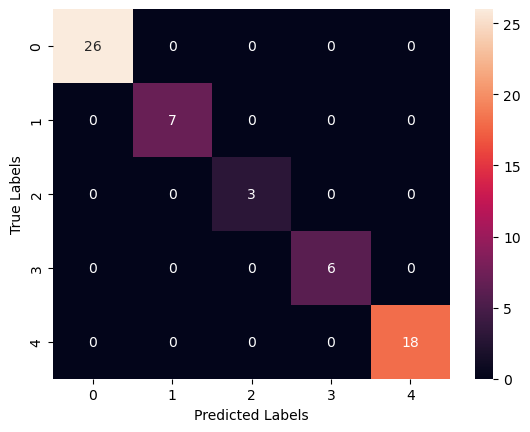

In [30]:
## GridSearch
from sklearn.model_selection import GridSearchCV
# try pipeline
xr=X.copy()
yr=y.copy()

X_train, X_test, y_train, y_test = train_test_split(xr, yr, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape

cat_col = [1,2,3]
num_col = [0,4]

results={}

# Define the transformer
transform = ColumnTransformer(
    transformers=[
        ("encoder", Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
            ('encoder', OrdinalEncoder()) 
        ]), cat_col),
        
        ("num_transform", Pipeline(steps=[
            ('imputer', SimpleImputer(strategy="median")),  # Impute missing numeric values
            ('scaler', StandardScaler())  
        ]), num_col),
    ],
    remainder='passthrough'  # Keep other columns as is
)

models_grids = {
    "Random Forest": RandomForestClassifier(),
}

param_grids = {
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
}

# Loop through each model and evaluate
for model_name, model in models_grids.items():
    print(f"\nEvaluating {model_name} with GridSearchCV...")
        
    # Define the pipeline
    pipeline = Pipeline(steps=[
        ('transform', transform),
        ('smote', SMOTE()),  # Apply SMOTE for oversampling
        ('classifier', model)  # Use the current model
        ])

    # Apply GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=3, n_jobs=-1, verbose=1)
        
    # Fit the model using GridSearchCV
    grid_search.fit(X_train, y_train)

    # Best hyperparameters found by GridSearchCV
    best_params = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_params}")

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Predict and evaluate using the best model
    y_pred = best_model.predict(X_test)
        
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    print("Accuracy: ", str(round(accuracy, 2) * 100) + "%", "F1: ", round(f1, 2))


    print('Model')
    print(f"Accuracy score: {accuracy_score(y_test, y_pred):.3f}")
    print("\nClassification Report:", classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Store results
    results[model_name] = {
        "accuracy": accuracy,
        "f1":f1,
        "best_params": best_params,
        "best_model":best_model,
        }


In [31]:
# Model prediction tester
x_input=X.copy()
y_input=y.copy()

test=x_input.loc[30]
print('test input\n', test)
print('true value: ',y_input.iloc[30])

testset=test.values
user_input=testset.reshape(1, -1)
# test1
pred=best_model.predict(user_input)[0]
print('prediction: ', pred)

test input
 Age                18
Sex                 F
BP             NORMAL
Cholesterol    NORMAL
Na_to_K          8.75
Name: 30, dtype: object
true value:  drugX
prediction:  drugX


C:\Users\sudwa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\sudwa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [32]:
feature_names = x_input.columns.tolist()
feature_names

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

In [33]:
# Function to input user data and predict

def predict_user_input(Age, Sex, BP, Cholesterol, Na_to_K):
    # Define the feature names (you should replace these with the actual feature names in your dataset)
    feature_names = x_input.columns.tolist()

    # Map user inputs to the correct feature order and types
    user_input = [Age, Sex, BP, Cholesterol, Na_to_K]

    # Convert user input into a DataFrame with the same structure as X
    user_input_df = pd.DataFrame([user_input], columns=feature_names)

    # Predict the drug class using the trained model
    prediction = best_model.predict(user_input_df)

    # Output the predicted class
    print(f"\nPredicted Drug Classification: {prediction[0]}")



In [34]:
# Example usage
predict_user_input(30, "M", "HIGH", "NORMAL", 15.4)


Predicted Drug Classification: DrugY
